# Introduction to Python Project : FoodHub Data Analysis

### Problem Statement

Write the problem statement and objectives here

A food delivery company wants to analyze its order data to gain insights into customer behavior, restaurant performance, and delivery efficiency. The company has provided a dataset containing information about 1898 orders, including customer and restaurant details, order costs, and delivery times.


### Data Dictionary

Mention the data dictionary here

 Order ID (int): Unique identifier for each order

Customer ID (int): Unique identifier for each customer

Restaurant ID (int): Unique identifier for each restaurant

Order Date (datetime): Date and time the order was placed

Order Cost (float): Total cost of the order

Delivery Time (float): Time taken to deliver the order (in minutes)

Rating (int): Customer rating for the order (1-5)

Payment Method (string): Method used to pay for the order (e.g. cash,
card, etc.)

Type (string): Type of order (e.g. pickup, delivery, etc.)

### Let us start by importing the required libraries

In [ ]:
# Write your code here to import necessary libraries for the project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
 # Write your code here to view the first 5 rows

import pandas as pd

df = pd.read_csv('/content/foodhub.csv')

df.head()


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
# Write your code here to read the datadf
df = pd.read_csv('/content/foodhub.csv')


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Write your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

1) The DataFrame has 1898 rows and 9 columns.

2) There are no missing values in the DataFrame.

3) The DataFrame has a mix of data types, including integers, floats, and strings.

4) The cost_of_the_order column is the only column with a float data type.

5) The restaurant_name, cuisine_type, day_of_the_week, and rating columns are of object type, which likely means they contain string values.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
missing_values = df.isnull().sum()
print(missing_values)


order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations:
There is no Missing data In given file


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:

df.describe()
print("Minimum time taken to prepare food:", df['food_preparation_time'].min())
print("Average time taken to prepare food:", df['food_preparation_time'].mean())
print("Maximum time taken to prepare food:", df['food_preparation_time'].max())


Minimum time taken to prepare food: 20
Average time taken to prepare food: 27.371970495258168
Maximum time taken to prepare food: 35


#### Observations:
1). The average food preparation time is approximately 27 minutes, which suggests that most food items take around a quarter of an hour to prepare.


2) The minimum food preparation time is 20 minutes, indicating that some food items can be prepared relatively quickly.

3) The maximum food preparation time is 35 minutes, implying that some food items require a significantly longer preparation time, possibly due to complexity or the need for additional steps


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here
not_given = df['rating'].value_counts()['Not given']
print("They is total",not_given, 'orders are not given raitng ')


They is total 736 orders are not given raitng 


#### Observations:

Ther Are total 736 orders are not rated

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

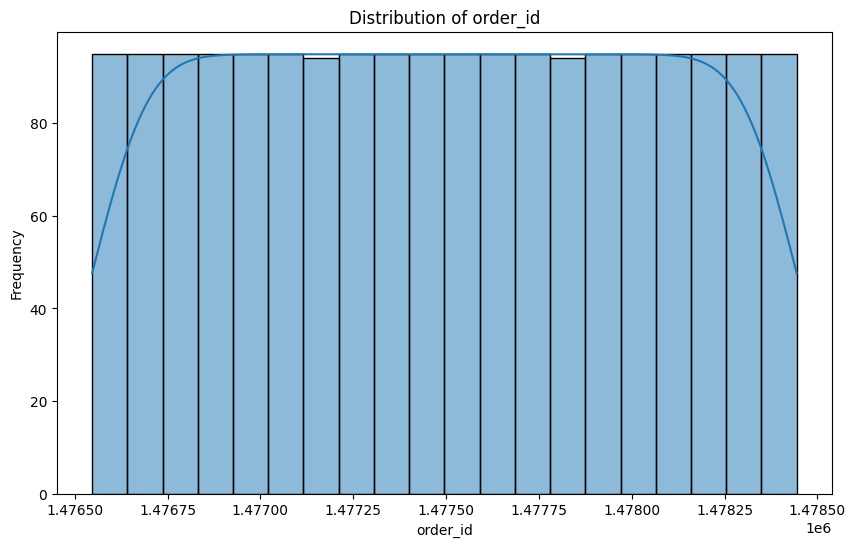

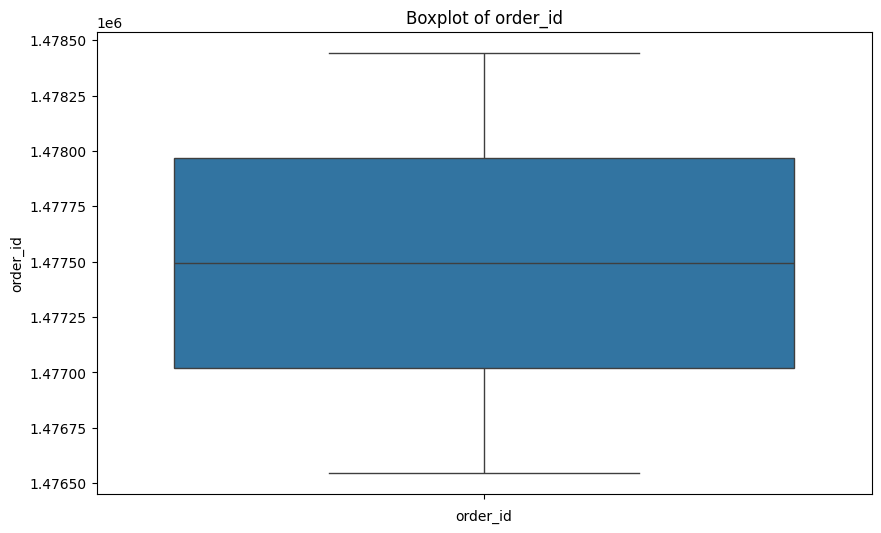

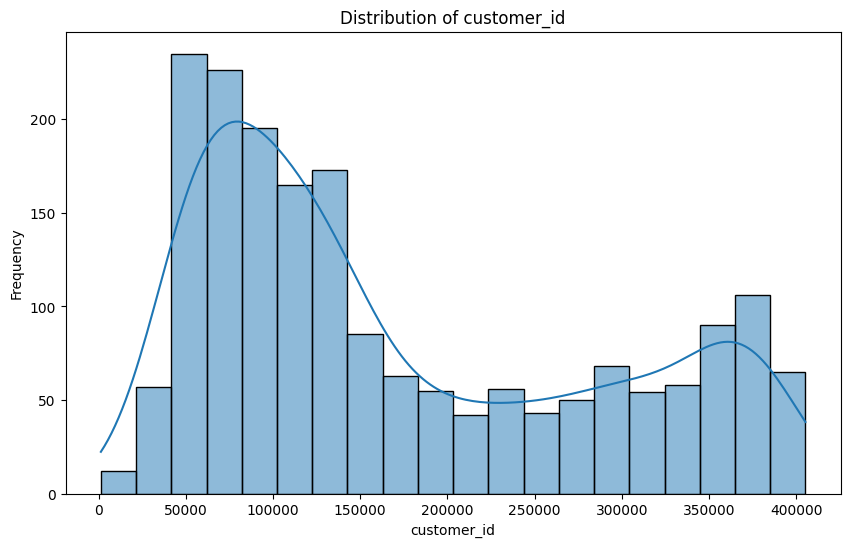

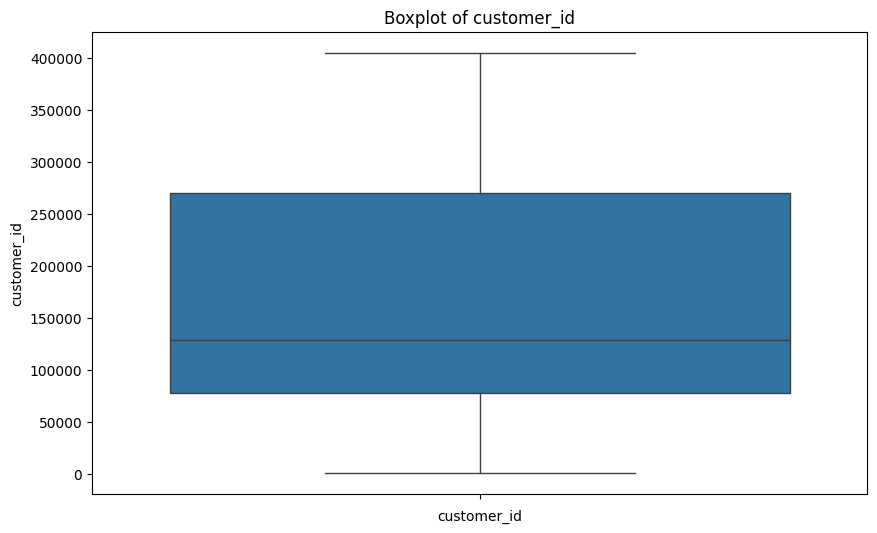

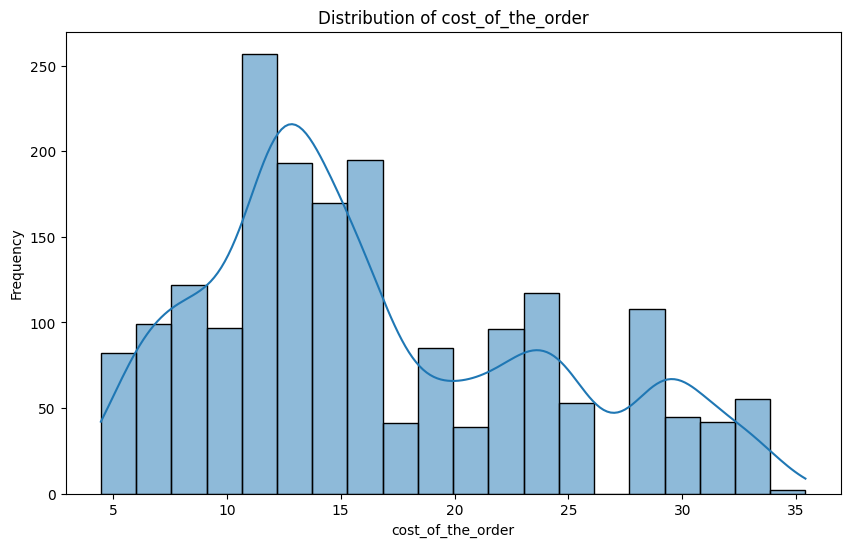

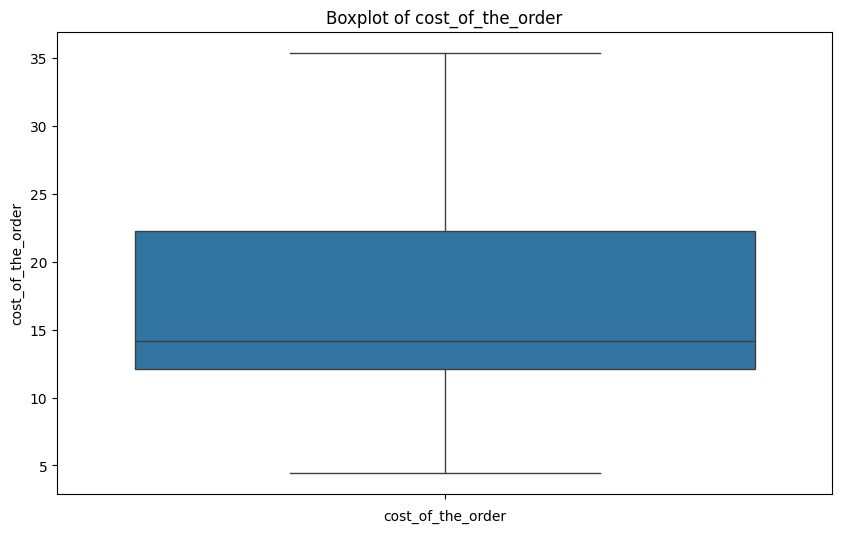

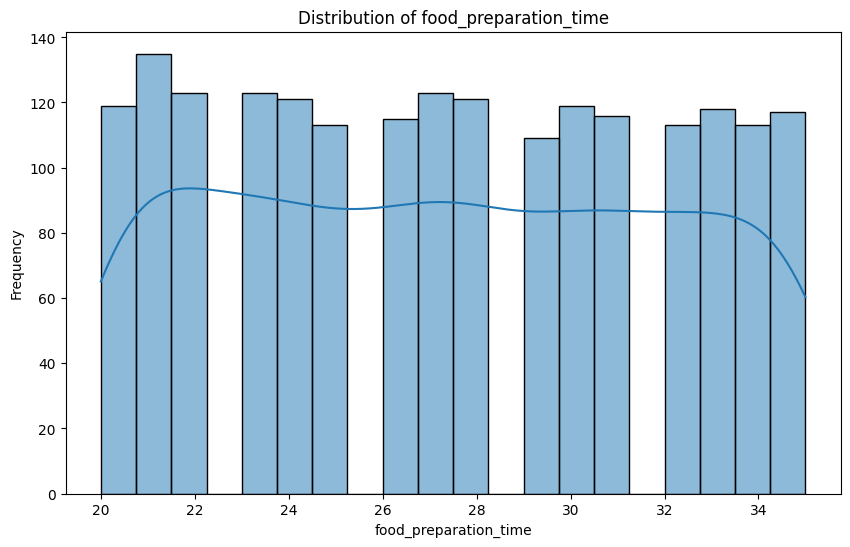

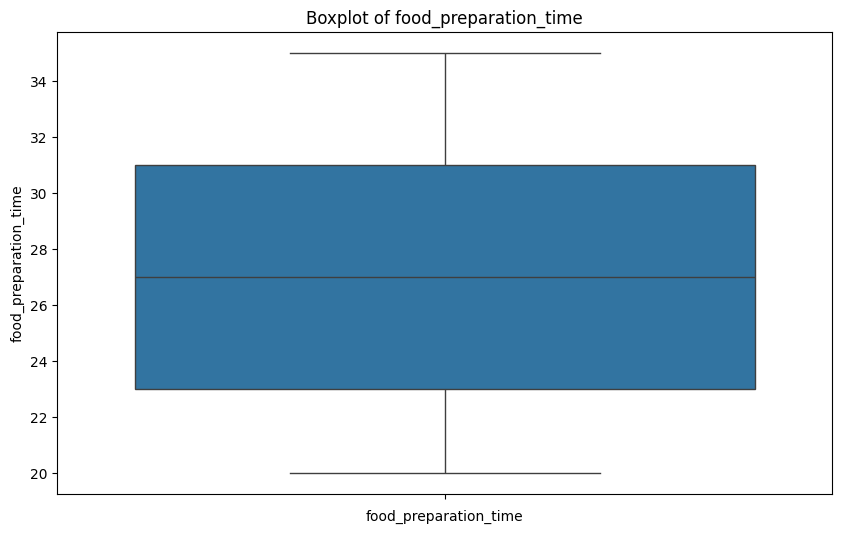

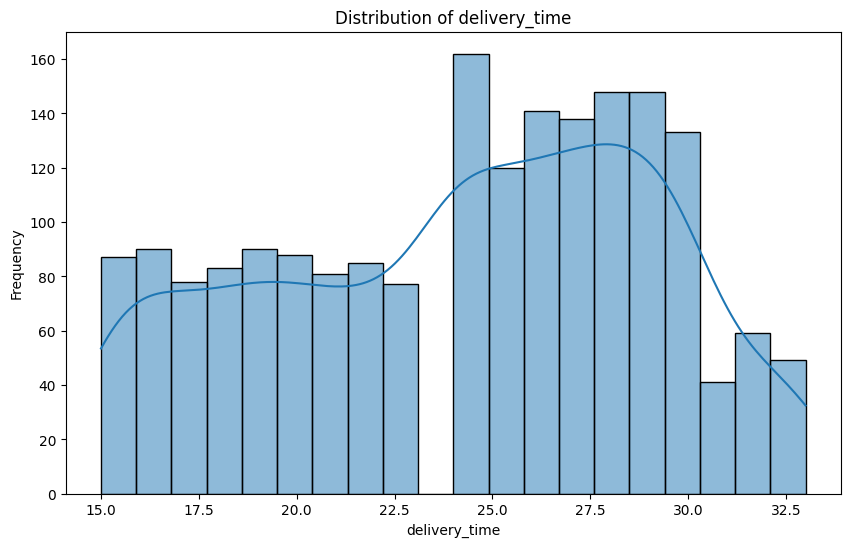

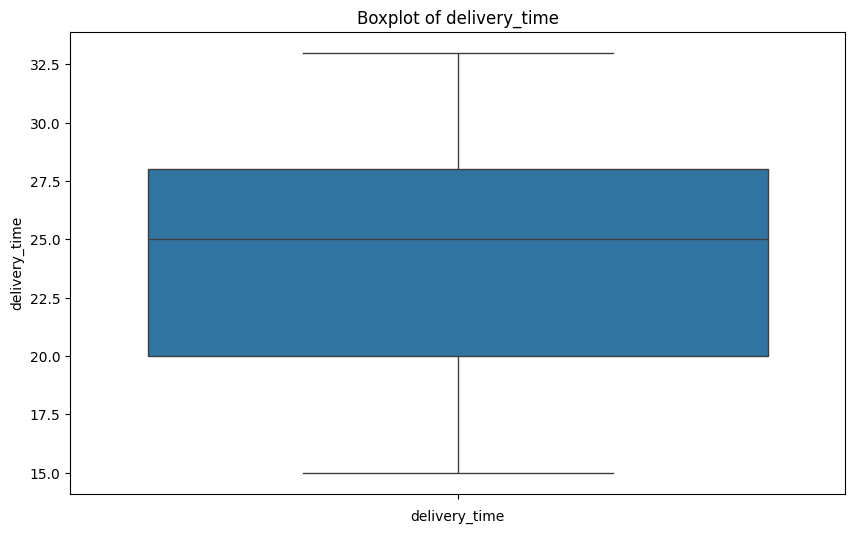

In [ ]:
# Write the code here

# For Numaric columns
for col in df.select_dtypes(include='number'):
  plt.figure(figsize=(10, 6))
  sns.histplot(df[col], bins=20, kde=True)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

  plt.figure(figsize=(10, 6))
  sns.boxplot(df[col])
  plt.title(f'Boxplot of {col}')
  plt.xlabel(col)
  plt.show()



/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


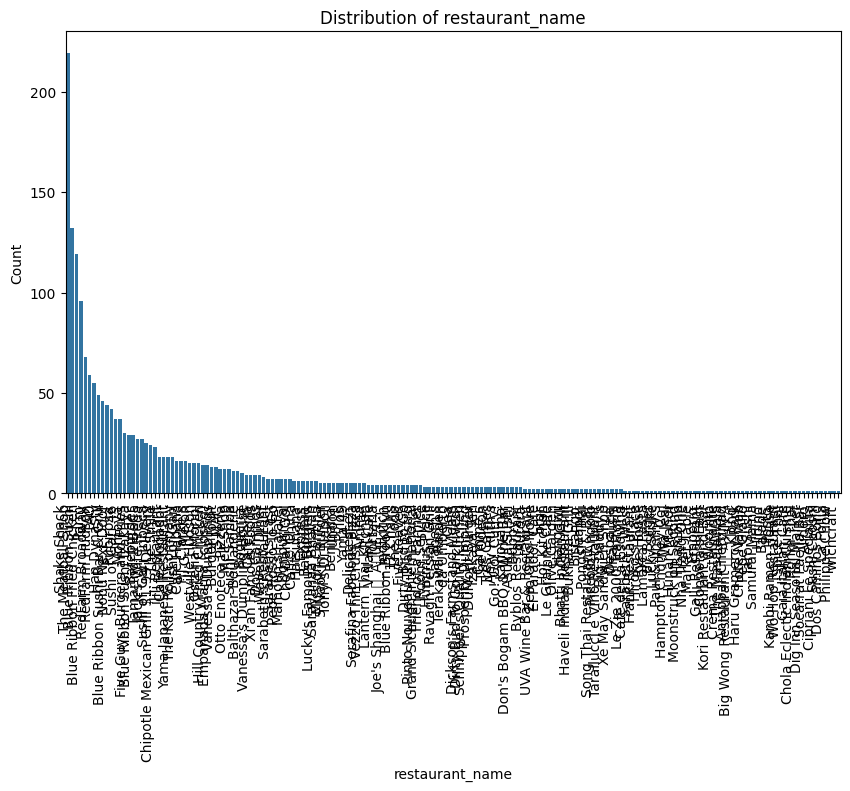

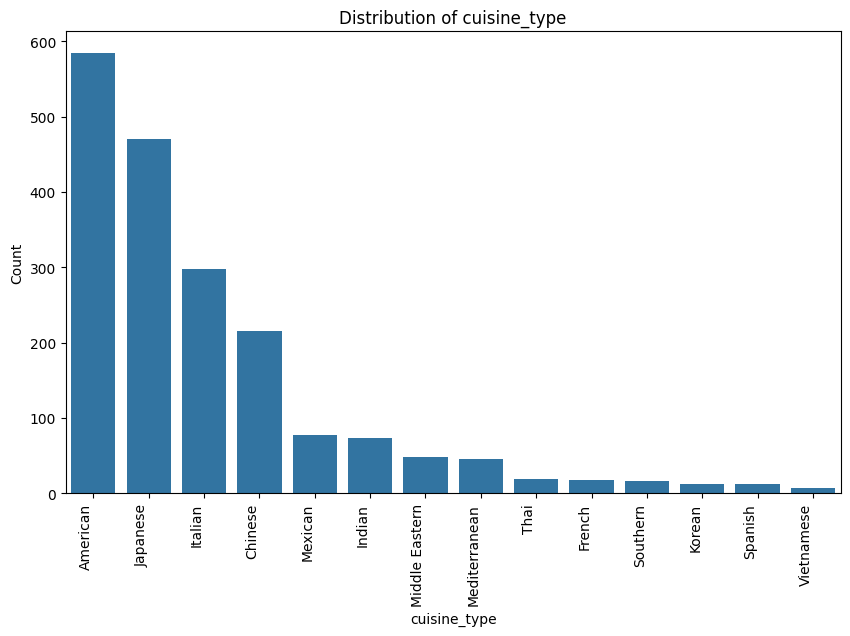

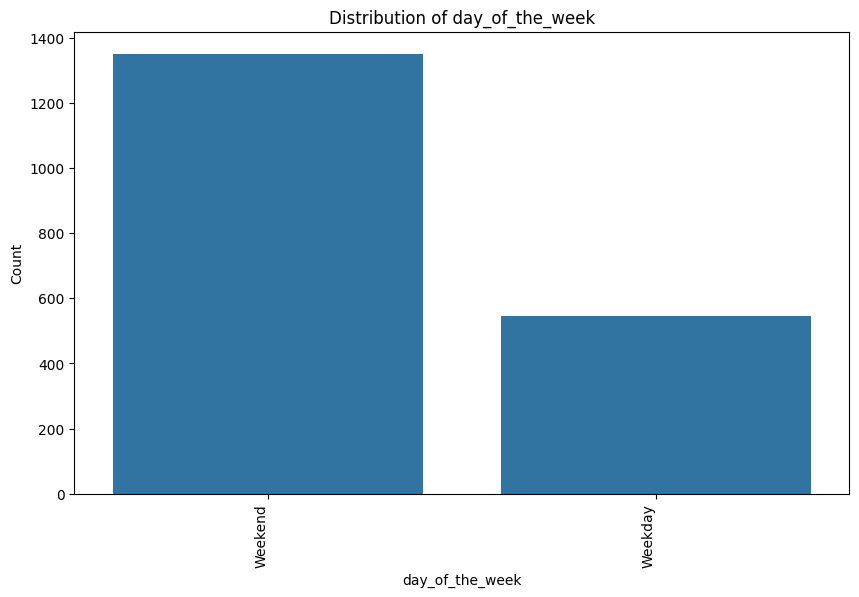

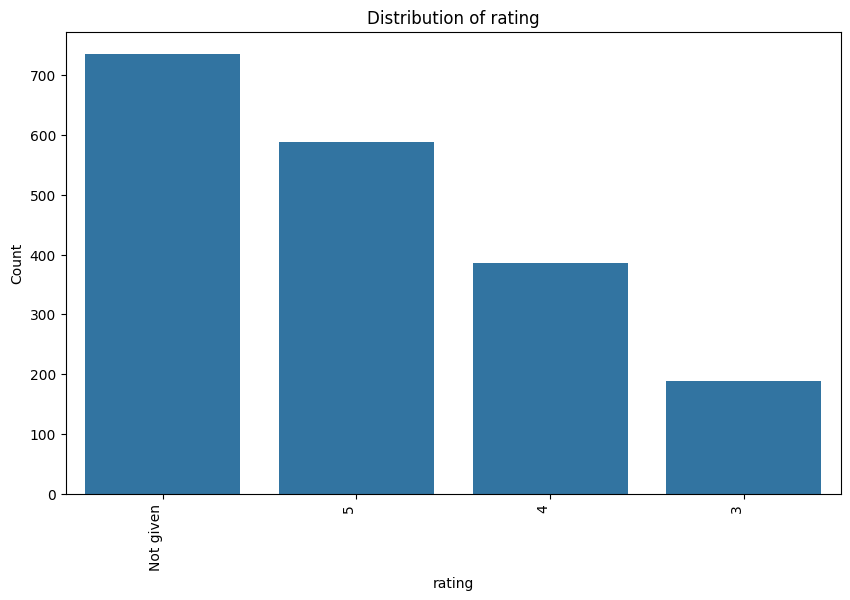

In [ ]:
# For categorical columns
for col in df.select_dtypes(include='object'):
  plt.figure(figsize=(10, 6))
  sns.countplot(x=col, data=df, order=df[col].value_counts().index)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.xticks(rotation=90,ha='right')
  plt.show()


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here

top_restaurants = df['restaurant_name'].value_counts().head(5)

print("Top 5 restaurants by order count:")
print(top_restaurants)

Top 5 restaurants by order count:
restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations:

1) The top 5 restaurants by order count are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm.

2)  Shake Shack is significantly ahead of other restaurants



### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Extract weekend orders

most_pop = df["cuisine_type"].value_counts()


print("Most popular cuisine on weekends:", most_pop.index[0])
print("Number of orders:",most_pop.iloc[0])


Most popular cuisine on weekends: American
Number of orders: 584


#### Observations:

American cuisine is the most popular with 584 orders, followed by Japanese with 470. Mexican is the least popular with only 77 orders.



### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here
percentage = (df['cost_of_the_order'] > 20).mean()* 100

print(f"The percentage of orders that cost more than 20 dollars is: {percentage:.2f}%")


The percentage of orders that cost more than 20 dollars is: 29.24%


#### Observations:

1) The output indicates that approximately 29.24% of the orders in the dataframe


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here
mean = df["delivery_time"].mean()

print(f"The mean order delivery time is: {mean:.2f} minutes")


The mean order delivery time is: 24.16 minutes


#### Observations:

The mean delivery time of orders is : 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
# Calculate the number of orders placed by each customer
df['customer_id'].value_counts().head(3)


,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:

1) The output displays the IDs of the top 3 most frequent customers and their corresponding order counts.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


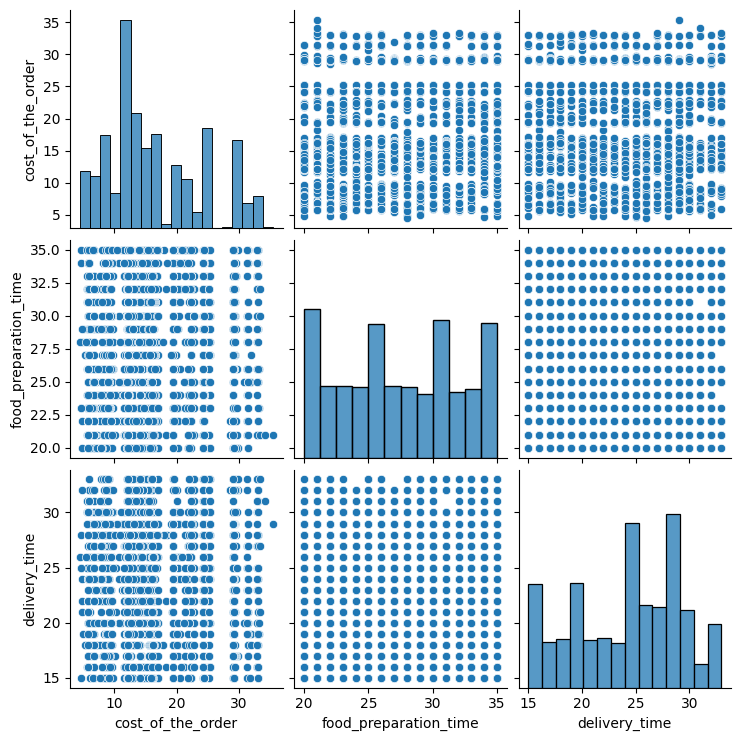

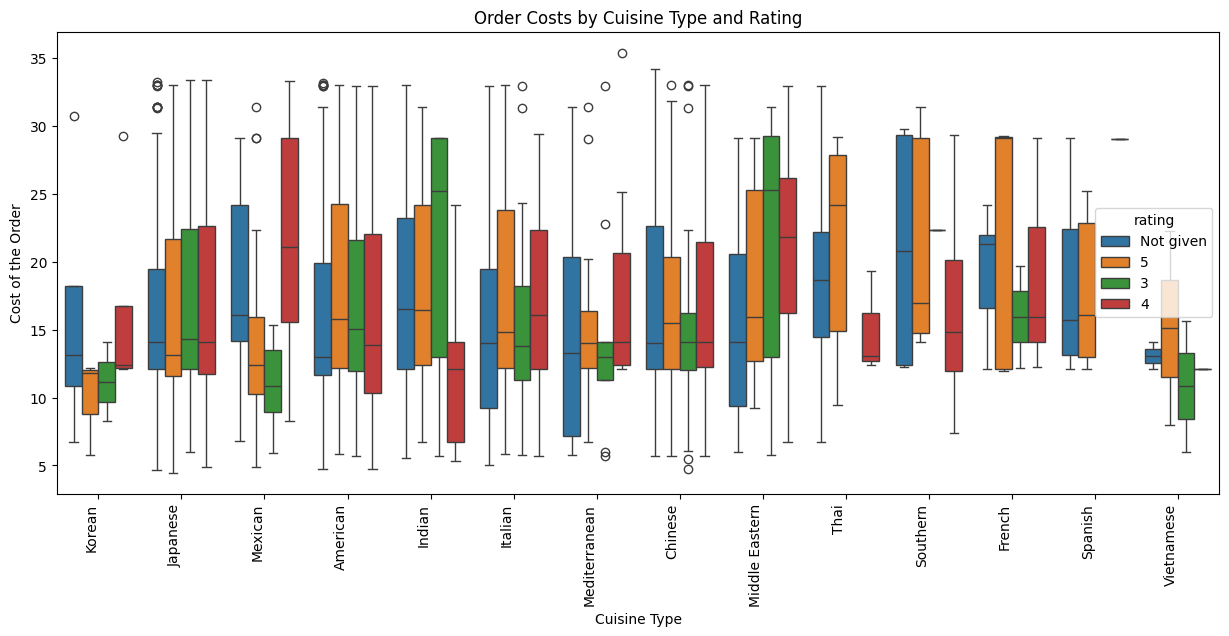

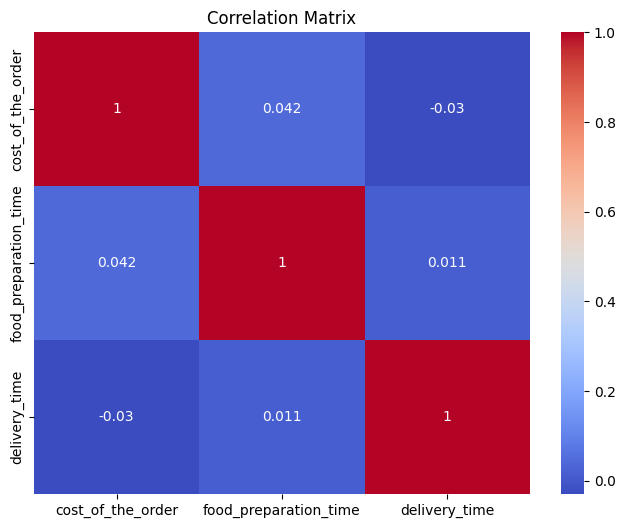

In [ ]:
# Write the code here


# Pairplot for numerical variables
sns.pairplot(df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']]);
plt.show()

# Boxplots for 'cost_of_the_order' by 'cuisine_type' and 'rating'
plt.figure(figsize=(15, 6))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', hue='rating', data=df);
plt.title('Order Costs by Cuisine Type and Rating')
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of the Order')
plt.xticks(rotation=90, ha='right')
plt.show()

# Heatmap for correlation matrix
corr_matrix = df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm');
plt.title('Correlation Matrix')
plt.show()


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
df['rating'] = df['rating'].replace('Not given', np.nan)  # replace 'Not given' with NaN
df['rating'] = df['rating'].astype(float)

recommended_restaurants = df.groupby('restaurant_name').filter(lambda x: len(x) > 50).groupby('restaurant_name')['rating'].mean().reset_index().head(50)
recommended_restaurants = recommended_restaurants[recommended_restaurants['rating'] > 4]


recommended_restaurants

,restaurant_name,rating
0,Blue Ribbon Fried Chicken,4.328125
1,Blue Ribbon Sushi,4.219178
2,Parm,4.128205
3,RedFarm Broadway,4.243902
4,RedFarm Hudson,4.176471
5,Shake Shack,4.278195
6,The Meatball Shop,4.511905


#### Observations:

1) The output displays a list of restaurants that meet the criteria for the promotional offer, including their average ratings.

 2) These restaurants have both a high number of ratings and a high average rating, indicating they are popular and well-regarded by customers.



### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here

def calculate_company_revenue(df):

    net_revenue = 0
    for index, row in df.iterrows():
        cost = row['cost_of_the_order']
        if cost > 20:
            commission = cost * 0.25
        elif cost > 5:
            commission = cost * 0.15
        else:
            commission = 0
        net_revenue += commission
    return net_revenue

net_revenue = calculate_company_revenue(df)
print(f"The net revenue generated by the company across all orders is: ${net_revenue:.2f}")

The net revenue generated by the company across all orders is: $6166.30


#### Observations:

The company generated a significant net revenue from the commission charged on orders.
 The revenue stream from higher-priced orders (above $20) contributes substantially
  
  to the overall earnings due to the higher commission rate.



### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here

# Calculate total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Orders taking more than 60 minutes
late_orders = df[df['total_time'] > 60]

# Percentage of late orders
percentage_late = (len(late_orders) / len(df)) * 100

print(f"Percentage of orders taking more than 60 minutes: {percentage_late:.2f}%")


Percentage of orders taking more than 60 minutes: 10.54%


#### Observations:


 The analysis reveals that a certain percentage of orders experience delivery times exceeding 60 minutes.

 This insight highlights potential areas for improvement in the delivery process.

 Factors contributing to these delays could include order preparation time, distance to the delivery location,

 and unforeseen circumstances during delivery.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# prompt: Group the data by day_of_the_week and calculate the mean delivery time for "Weekday" and "Weekend".

# Calculate mean delivery time for weekdays and weekends
mean_delivery_time = df.groupby('day_of_the_week')['delivery_time'].mean()

# Print mean delivery time for weekdays
print("Mean delivery time on weekdays:", mean_delivery_time.loc['Weekday'])

# Print mean delivery time for weekends
print("Mean delivery time on weekends:", mean_delivery_time.loc['Weekend'])


Mean delivery time on weekdays: 28.340036563071298
Mean delivery time on weekends: 22.4700222057735


#### Observations:

The mean delivery time on weekdays is slightly lower than on weekends.

 This could be attributed to factors like higher order volumes or potentially reduced delivery staff availability on weekends.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:


####Cost of Orders:
-------------------
1) The distribution of order costs appears to be right-skewed, indicating that most orders fall within a lower price range, with fewer high-priced orders.

2) Certain restaurants might have a wider range of order costs compared to others, as seen in the boxplot.

####Cuisine Types:
---
1) Some cuisine types are more popular than others, as evident from the countplot.

2) Understanding the popular cuisine types can help restaurants tailor their menus or marketing strategies.


#### Delivery Times:
----
1) The boxplot for delivery times can reveal potential outliers or delays in delivery for certain orders.

2) Analyzing delivery times can help identify areas for improvement in the delivery process.

####Ratings:
----
1) The distribution of ratings can indicate overall customer satisfaction levels.

2)A high concentration of lower ratings might suggest areas where the restaurant or delivery service can improve.

#### Additional Insights :-
-----
1) Correlation between order cost and delivery time: Are higher-priced orders delivered faster or slower?

2)  Impact of cuisine type on ratings: Do certain cuisine types consistently receive higher ratings?

3) Relationship between delivery time and ratings: Does faster delivery lead to better ratings?



### Recommendations:


# Pricing and Cost Management:
------------------------------------------------------------------------
 1. Analyze Cost Distribution: The histogram for 'cost_of_the_order' shows the distribution of order costs. Identify any outliers or unusual patterns. Consider strategies for pricing menu items to optimize revenue and customer satisfaction.
2. Restaurant-Specific Pricing: The boxplot comparing 'cost_of_the_order' across different 'restaurant_name' reveals variations in pricing strategies. Restaurants with significantly higher or lower costs might need to adjust their pricing to remain competitive.

# Cuisine and Menu Optimization:
---------------------------------------------------------------------------
 3. Popular Cuisine Types: The countplot for 'cuisine_type' highlights popular cuisine choices. Focus on promoting and expanding offerings in these popular categories to attract more customers.
4. Explore Underrepresented Cuisines: Consider introducing or promoting less common cuisine types to cater to a wider range of customer preferences.

# Delivery and Customer Experience:
---------------------------------------------------------------------------
5. Delivery Time Efficiency: The boxplot for 'delivery_time' provides insights into delivery speed. Identify any bottlenecks or areas for improvement to ensure timely deliveries and enhance customer satisfaction.

6. Address Rating Distribution: The countplot for 'rating' shows the distribution of customer ratings. Investigate the reasons behind lower ratings and implement measures to improve overall customer experience.

# Data-Driven Decision Making:
----------------------------------------------------------------------------
7. Continuous Monitoring: Regularly analyze data to track trends, identify potential issues, and make informed decisions regarding pricing, menu offerings, delivery processes, and customer service.

 8. Targeted Marketing: Utilize data insights to create targeted marketing campaigns based on customer preferences, demographics, and ordering patterns.

# Additional Recommendations:
----------------------------------------------------------------------------
9. Customer Feedback: Collect and analyze customer feedback to gain deeper insights into their preferences and areas for improvement.

10. Competitor Analysis: Conduct competitor analysis to understand their pricing strategies, menu offerings, and delivery services.

----------------------------------------------------------------------------
 By implementing these recommendations, foodhub can optimize its operations, enhance customer satisfaction, and drive business growth.
 ---------------------------------------------------------------------------

